# RNA-Seq data analysis pipeline: an example of processing a Zika virus study from NCBI's GEO

_Zichen Wang_ and _Avi Ma'ayan_

There is currently only one study profiling gene expression changes after Zika virus (ZIKV) infection of human cells within the NCBI's Gene Expression Omnibus (GEO) [GSE78711](http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE78711). In this study human iPSCs, differentiated into neuronal progenitors, were infected with ZIKV, and then gene expression was measured by RNA-seq using two platforms in duplicates. The total number of samples are eight with four untreated samples and four infected samples with the virus. The first step in processing this data is to read carefully the description about the study on GEO, identify the control and treatment samples, and read the associated publication. The next step is to extract the following information:
 
`GSE=GSE78711`

`GPL=GPL18573`

`control_ids = [GSM2073121, GSM2073122, GSM2075585, GSM2075586]`

`perturbation_ids = [GSM2073123, GSM2073124, GSM2075587, GSM2075588]`


In [1]:
import numpy as np
import pandas as pd

In [2]:
## Assign the 4 variables gse for study, gpl for platform, 
## ctrl_ids for un-perturbed samples, pert_ids for treatment samples.
## Make sure that there are at least two samples in each group.
gse = 'GSE78711'
gpl = 'GPL18573'
ctrl_ids = ['GSM2073121', 'GSM2073122', 'GSM2075585', 'GSM2075586']
pert_ids = ['GSM2073123', 'GSM2073124', 'GSM2075587', 'GSM2075588']

In [3]:
## download the processed file, this file provides some metadata about the samples.
# !wget ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE78nnn/GSE78711/suppl/GSE78711_Table.S2A.reads_R1.xlsx

In [4]:
df = pd.read_excel('../GSE78711_Table.S2A.reads_R1.xlsx')
df

,Sample,Seq reads coverage (million),Mapped ratio,Seq method
0,Mock1-1,15.8,90.7% concordant pair alignment rate,Pair-end
1,Mock2-1,14.8,88.8% concordant pair alignment rate,Pair-end
2,ZIKV1-1,14.6,90.2% concordant pair alignment rate,Pair-end
3,ZIKV2-1,15.2,89.9% concordant pair alignment rate,Pair-end
4,Mock1-2,72.0,89.5% overall read mapping rate,Single-end
5,Mock2-2,92.0,89.4% overall read mapping rate,Single-end
6,ZIKV1-2,75.0,88.5% overall read mapping rate,Single-end
7,ZIKV2-2,66.0,88.2% overall read mapping rate,Single-end


In [5]:
# Download the SRA files
# This bash script is commented out here, because we don't want to download the files every time.
# !wget -r ftp://ftp-trace.ncbi.nlm.nih.gov/sra/sra-instant/reads/ByStudy/sra/SRP%2FSRP070%2FSRP070895/*

### Downloaded SRA files were processed in the following steps:
1. `fastq-dump` in the SRA-toolkit to generate .fastq files
2. `STAR` for the read alignment
3. `featureCounts` for assigning reads to genes
4. `edgeR` Bioconductor package were used to compute CPM and RPKM
---
Steps 1-3 were processed by [`analyze_sra.sh`](https://github.com/MaayanLab/Zika-RNAseq-Pipeline/blob/master/analyze_sra.sh)

Step 4 were done by [`normalize.R`](https://github.com/MaayanLab/Zika-RNAseq-Pipeline/blob/master/normalize.R)

---
After the above steps, we can start to analyze the processed expression matrix of genes in Python

In [6]:
## Check the alignment stats
## This will output the first 10 lines of all summary files from featureCounts
!head ../featureCount_output/*.summary 

==> ../featureCount_output/SRR3191542.count.txt.summary <==
Status	/home/maayanlab/Zika/star_output/SRR3191542Aligned.sortedByCoord.out.bam
Assigned	10859768
Unassigned_Ambiguity	277433
Unassigned_MultiMapping	1315262
Unassigned_NoFeatures	3658745
Unassigned_Unmapped	0
Unassigned_MappingQuality	0
Unassigned_FragementLength	0
Unassigned_Chimera	0
Unassigned_Secondary	0

==> ../featureCount_output/SRR3191543.count.txt.summary <==
Status	/home/maayanlab/Zika/star_output/SRR3191543Aligned.sortedByCoord.out.bam
Assigned	10167142
Unassigned_Ambiguity	264366
Unassigned_MultiMapping	1229314
Unassigned_NoFeatures	3217017
Unassigned_Unmapped	0
Unassigned_MappingQuality	0
Unassigned_FragementLength	0
Unassigned_Chimera	0
Unassigned_Secondary	0

==> ../featureCount_output/SRR3191544.count.txt.summary <==
Status	/home/maayanlab/Zika/star_output/SRR3191544Aligned.sortedByCoord.out.bam
Assigned	10024864
Unassigned_Ambiguity	243520
Unassigned_MultiMapping	1148955
Unassigned_NoFeatures	3421617
Unassign

In [7]:
## load the expression matrix
expr_df = pd.read_csv('../repCpmMatrix_featureCounts.csv')
expr_df = expr_df.set_index(expr_df.columns[0])
expr_df.head()

,SRR3191542,SRR3191543,SRR3191544,SRR3191545,SRR3194428,SRR3194429,SRR3194430,SRR3194431
Unnamed: 0,,,,,,,,
DDX11L1,0.000000,0.000000,0.199504,0.00000,0.000000,0.000000,0.020095,0.000000
WASH7P,16.759106,18.097515,17.057588,23.59738,2.491865,2.907422,2.190377,2.396793
MIR6859-2,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
MIR6859-1,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
FAM138A,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000


In [8]:
print expr_df.shape

(25370, 8)


In [9]:
## filter out non-expressed genes
expr_df = expr_df.loc[expr_df.sum(axis=1) > 0, :]
print expr_df.shape

## filter out lowly expressed genes
mask_low_vals = (expr_df > 0.3).sum(axis=1) > 2
expr_df = expr_df.loc[mask_low_vals, :]

print expr_df.shape

(21983, 8)
(16242, 8)


We found this a `RunInfo Table` on the SRP page available in this URL [http://www.ncbi.nlm.nih.gov/Traces/study/?acc=SRP070895](http://www.ncbi.nlm.nih.gov/Traces/study/?acc=SRP070895). There is a button called 'RunInfo Table'. Clicking on this button you can obtain a spreadsheet with additional metadata. Next we read this file and extract the relavant variables from it.

In [10]:
meta_df = pd.read_csv('../SraRunTable.txt', sep='\t').set_index('Run_s')
print meta_df.shape
# re-order the index to make it the same with expr_df
meta_df = meta_df.ix[expr_df.columns]
meta_df

(8, 27)


,BioSample_s,Experiment_s,LibraryLayout_s,LoadDate_s,MBases_l,MBytes_l,SRA_Sample_s,Sample_Name_s,infection_status_s,Assay_Type_s,...,Library_Name_s,Organism_s,Platform_s,ReleaseDate_s,SRA_Study_s,cell_type_s,g1k_analysis_group_s,g1k_pop_code_s,source_s,source_name_s
SRR3191542,SAMN04517925,SRX1602854,PAIRED,2016-02-26,1141,464,SRS1312741,GSM2073121,mock infected,RNA-Seq,...,<not provided>,Homo sapiens,ILLUMINA,2016-03-04,SRP070895,Neural Progenitor cells,<not provided>,<not provided>,<not provided>,human Neural Progenitor cells
SRR3191543,SAMN04517926,SRX1602855,PAIRED,2016-02-26,1063,443,SRS1312740,GSM2073122,mock infected,RNA-Seq,...,<not provided>,Homo sapiens,ILLUMINA,2016-03-04,SRP070895,Neural Progenitor cells,<not provided>,<not provided>,<not provided>,human Neural Progenitor cells
SRR3191544,SAMN04517927,SRX1602856,PAIRED,2016-02-26,1059,429,SRS1312738,GSM2073123,Zika infected,RNA-Seq,...,<not provided>,Homo sapiens,ILLUMINA,2016-03-04,SRP070895,Neural Progenitor cells,<not provided>,<not provided>,<not provided>,human Neural Progenitor cells
SRR3191545,SAMN04517928,SRX1602857,PAIRED,2016-02-26,1095,445,SRS1312739,GSM2073124,Zika infected,RNA-Seq,...,<not provided>,Homo sapiens,ILLUMINA,2016-03-04,SRP070895,Neural Progenitor cells,<not provided>,<not provided>,<not provided>,human Neural Progenitor cells
SRR3194428,SAMN04521221,SRX1605077,SINGLE,2016-02-29,5248,2383,SRS1314803,GSM2075585,mock infected,RNA-Seq,...,<not provided>,Homo sapiens,ILLUMINA,2016-03-04,SRP070895,Neural Progenitor cells,<not provided>,<not provided>,<not provided>,human Neural Progenitor cells
SRR3194429,SAMN04521222,SRX1605078,SINGLE,2016-02-29,6806,3092,SRS1314802,GSM2075586,mock infected,RNA-Seq,...,<not provided>,Homo sapiens,ILLUMINA,2016-03-04,SRP070895,Neural Progenitor cells,<not provided>,<not provided>,<not provided>,human Neural Progenitor cells
SRR3194430,SAMN04521223,SRX1605079,SINGLE,2016-02-29,5481,2495,SRS1314801,GSM2075587,Zika infected,RNA-Seq,...,<not provided>,Homo sapiens,ILLUMINA,2016-03-04,SRP070895,Neural Progenitor cells,<not provided>,<not provided>,<not provided>,human Neural Progenitor cells
SRR3194431,SAMN04521224,SRX1605080,SINGLE,2016-02-29,4776,2181,SRS1314800,GSM2075588,Zika infected,RNA-Seq,...,<not provided>,Homo sapiens,ILLUMINA,2016-03-04,SRP070895,Neural Progenitor cells,<not provided>,<not provided>,<not provided>,human Neural Progenitor cells


Now we have everything setup, the first thing to do is to generate PCA plots to observe whether the samples cluster
as expected: controls with controls, treatments with treatments.

In [11]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42 ## Output Type 3 (Type3) or Type 42 (TrueType)
rcParams['font.sans-serif'] = 'Arial'
# ignore FutureWarning that may pop up when plotting
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 


In [12]:
from IPython.core.display import HTML, display
# to display hyperlink as <a> tag in output cells
def display_link(url):
    raw_html = '<a href="%s" target="_blank">%s</a>' % (url, url)
    return display(HTML(raw_html))

You can obtain the script [`RNAseq`](https://github.com/MaayanLab/Zika-RNAseq-Pipeline/blob/master/RNAseq.py) from this repo.

In [13]:
import RNAseq

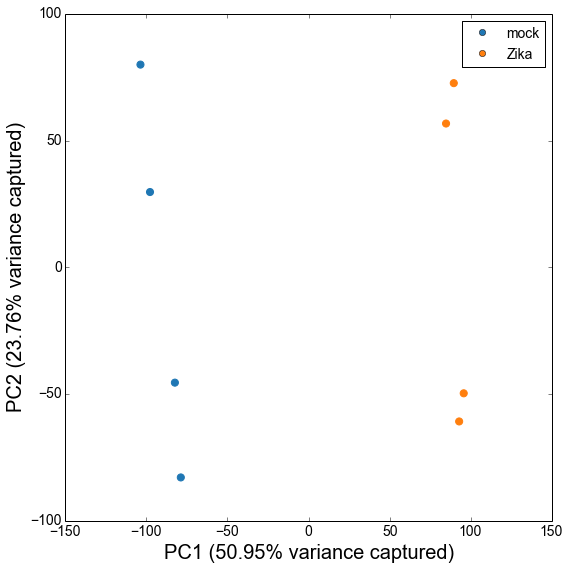

In [14]:
# plot PCA
%matplotlib inline
RNAseq.PCA_plot(expr_df.values, meta_df['infection_status_s'], 
         standardize=2, log=True, 
         show_text=False, sep=' ', legend_loc='upper right')

The PCA plot below is the same as above, except that we color the samples by platform (two Illumina sequencing machines used: [Illumina MiSeq](http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GPL15520) for paired-end and [Illumina NextSeq 500](http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GPL18573) for single-end). 

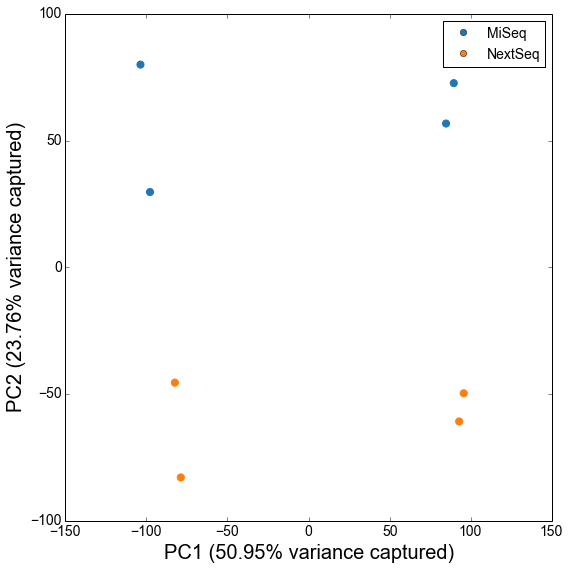

In [15]:
d_layout_platform = {'PAIRED': 'MiSeq', 'SINGLE': 'NextSeq 500'}
RNAseq.PCA_plot(expr_df.values, [d_layout_platform[l] for l in meta_df['LibraryLayout_s']], 
         standardize=2, log=True, 
         show_text=False, sep=' ', legend_loc='upper right')

Alternatively, we can visualize the gene expression matrix using [Clustergrammer](http://amp.pharm.mssm.edu/clustergrammer/). Clustergrammer is a visualization tool that enables users and web-based applications to easily generate interactive and shareable clustergram-heatmap visualizations from a matrix of data. In the following code cells we subset the expression matrix using genes with the largest variance. We then log transform and z-score center the expression matrix so that it has average of zeros and 1 standard deviation for each genes on the rows. We write the subset of expression matrix into text file then use HTTP `POST` this file to the [API of Clustergrammer](http://amp.pharm.mssm.edu/clustergrammer/help#api). The API then respond with a URL of the interactive clustergram.

In [16]:
# Subset the expression DataFrame using top 800 genes with largest variance
variances = np.var(expr_df, axis=1)
srt_idx = variances.argsort()[::-1]
expr_df_sub = expr_df.iloc[srt_idx].iloc[:800]
print expr_df_sub.shape
expr_df_sub.head()

(800, 8)


,SRR3191542,SRR3191543,SRR3191544,SRR3191545,SRR3194428,SRR3194429,SRR3194430,SRR3194431
Unnamed: 0,,,,,,,,
EEF1A1,8021.718328,7752.031003,7137.952196,6955.714584,4366.286832,4329.009117,3957.709649,3824.428216
WSB1,4070.252698,4206.295142,1150.738803,1236.831526,4592.651973,4828.943487,1296.019894,1376.058527
TUBA1A,5898.284383,6204.103375,5367.653865,5144.809094,4246.137423,4503.896870,3828.557793,3731.460320
ACTG1,6083.463293,6486.975396,4879.367940,4734.369419,6019.971299,6360.412214,4719.880434,4699.994974
MIAT,2971.610443,2985.106336,1477.426527,1454.333606,2832.087276,2879.532851,1425.091370,1370.204822


In [17]:
# Log transform and z-score standardize the data and write to a .txt file 
expr_df_sub.index.name=''
expr_df_sub = np.log1p(expr_df_sub)
expr_df_sub = expr_df_sub.apply(lambda x: (x-x.mean())/x.std(ddof=0), axis=1)
# prettify sample names
sample_names = ['-'.join([x, d_layout_platform[y], z]) for x,y,z in
                   zip(meta_df['infection_status_s'], meta_df['LibraryLayout_s'], expr_df_sub.columns)]
expr_df_sub.columns = sample_names
expr_df_sub.to_csv('../expression_matrix_top800_genes.txt', sep='\t')

In [18]:
# POST the expression matrix to Clustergrammer and get the URL
import requests, json
clustergrammer_url = 'http://amp.pharm.mssm.edu/clustergrammer/matrix_upload/'

r = requests.post(clustergrammer_url, files={'file': open('../expression_matrix_top800_genes.txt', 'rb')})
link = r.text
display_link(link)

We can also display the result in this notebook using `<iframe>`

In [23]:
from IPython.display import IFrame
display(IFrame(link, width="1000", height="1000"))

Now we are ready to identify the differentially expressed genes between the two sets of samples: control versus treatment. We will achieve this using the [Characteristic Direction method](http://www.ncbi.nlm.nih.gov/pubmed/?term=24650281) published in _BMC Bioinformatics_ in 2014.

An implementation in Python of the Characteristic Direction method can be downloaded and installed from:
https://github.com/wangz10/geode.

In [20]:
import geode
d_platform_cd = {} # to top up/down genes
cd_results = pd.DataFrame(index=expr_df.index)

sample_classes = {}
for layout in meta_df['LibraryLayout_s'].unique():
    ## make sample_class 
    sample_class = np.zeros(expr_df.shape[1], dtype=np.int32)
    sample_class[meta_df['LibraryLayout_s'].values == layout] = 1
    sample_class[(meta_df['LibraryLayout_s'].values == layout) & 
                 (meta_df['infection_status_s'].values == 'Zika infected')] = 2
    platform = d_layout_platform[layout]
    sample_classes[platform] = sample_class

sample_classes['combined'] = sample_classes['MiSeq'] + sample_classes['NextSeq 500']
print sample_classes

for platform, sample_class in sample_classes.items():
    cd_res = geode.chdir(expr_df.values, sample_class, expr_df.index, 
                      gamma=.5, sort=False, calculate_sig=False)
    cd_coefs = np.array(map(lambda x: x[0], cd_res))
    cd_results[platform] = cd_coefs
    
    # sort CD in by absolute values in descending order
    srt_idx = np.abs(cd_coefs).argsort()[::-1]
    cd_coefs = cd_coefs[srt_idx][:600]
    sorted_DEGs = expr_df.index[srt_idx][:600]
    # split up and down
    up_genes = dict(zip(sorted_DEGs[cd_coefs > 0], cd_coefs[cd_coefs > 0]))
    dn_genes = dict(zip(sorted_DEGs[cd_coefs < 0], cd_coefs[cd_coefs < 0]))
    d_platform_cd[platform+'-up'] = up_genes
    d_platform_cd[platform+'-dn'] = dn_genes

print cd_results.head()

{'NextSeq 500': array([0, 0, 0, 0, 1, 1, 2, 2], dtype=int32), 'MiSeq': array([1, 1, 2, 2, 0, 0, 0, 0], dtype=int32), 'combined': array([1, 1, 2, 2, 1, 1, 2, 2], dtype=int32)}
              NextSeq 500     MiSeq  combined
Unnamed: 0                                   
WASH7P          -0.000979 -0.000245 -0.000377
LOC729737       -0.000539 -0.000131 -0.000201
LOC100133331    -0.000859 -0.000756 -0.000706
MIR6723         -0.000964 -0.001524 -0.001081
LOC100288069    -0.000657 -0.000378 -0.000431


In [21]:
## Check the cosine distance between the two signatures
from scipy.spatial.distance import cosine
from itertools import combinations
for col1, col2 in combinations(cd_results.columns, 2):
    print col1, col2, cosine(cd_results[col1], cd_results[col2])


NextSeq 500 MiSeq 0.012346509286
NextSeq 500 combined 0.00455841805086
MiSeq combined 0.00305230907374


The following code generates links for gene set enrichment analysis with Enrichr. 

[Enrichr](http://amp.pharm.mssm.edu/Enrichr/) is gene set enrichment analysis tool that compare the up or down gene sets computed here with over ~180,000 annotated gene sets belonging to ~90 gene set libraries covering pathway, ontology, and disease databases.

In [19]:
for key, d in d_platform_cd.items():    
    genes = d_platform_cd[key].keys()
    link = RNAseq.enrichr_link(genes)
    print key
    display_link(link)

MiSeq-up


NextSeq 500-dn


NextSeq 500-up


combined-up


MiSeq-dn


combined-dn


In [23]:
## Generate Enrichr links for up/down genes in an Excel file with the gene sets.
RNAseq.dict2xls_with_vals(d_platform_cd, ['gene', 'CD coef'], '../Enrichr_links_CD600.xls')

In [24]:
## Check the Enrichr results
enrichr_results = pd.read_excel('../Enrichr_links_CD600.xls', sheetname=None)
print enrichr_results.keys()

[u'Enrichr_links', u'combined-dn', u'NextSeq 500-dn', u'NextSeq 500-up', u'combined-up', u'MiSeq-dn', u'MiSeq-up']


In [25]:
## Display links in the pandas DataFrame
pd.set_option('display.max_colwidth', -1)
enrichr_results['Enrichr_links']['Link'] = enrichr_results['Enrichr_links']['Link']\
    .apply(lambda x: '<a href="%s">%s</a>' %(x, x))

HTML(enrichr_results['Enrichr_links'].to_html(escape=False))

,Gene list,Size,Link
0,MiSeq-dn,193,http://amp.pharm.mssm.edu/Enrichr/enrich?dataset=5vnr
1,MiSeq-up,407,http://amp.pharm.mssm.edu/Enrichr/enrich?dataset=5vns
2,NextSeq 500-dn,193,http://amp.pharm.mssm.edu/Enrichr/enrich?dataset=5vnt
3,NextSeq 500-up,407,http://amp.pharm.mssm.edu/Enrichr/enrich?dataset=5vnu
4,combined-dn,195,http://amp.pharm.mssm.edu/Enrichr/enrich?dataset=5vnv
5,combined-up,405,http://amp.pharm.mssm.edu/Enrichr/enrich?dataset=5vnw


[L1000CDS2](http://amp.pharm.mssm.edu/L1000CDS2/#/index) is a small molecule gene expression signature search engine. 
It contains gene expression signatures from ~30,000 small molecules. Users can search for small molecules that can potentially reverse or mimic the input gene expression signature.

---

The following code post the gene expression signatures induced by Zika infection to L1000CDS2 and print out the result URLs. 

In [26]:
def post_to_cds2(genes, vals, name=None, aggravate=False):
    ## post CD signature to L1000CDS2 API and return a CDS2 url
    url = 'http://amp.pharm.mssm.edu/L1000CDS2/query'
    cds2_url = None

    data = {
        "genes": map(lambda x: x.upper(), genes), 
        "vals":  vals
        }
    config = {"aggravate":aggravate,"searchMethod":"CD","share":True,"combination":True,"db-version":"latest"}
    metadata = [{"key":"name","value": name}]

    payload = {"data":data,"config":config,"meta":metadata}
    headers = {'content-type':'application/json'}
    r = requests.post(url,data=json.dumps(payload),headers=headers)
    resCD = r.json()
    shareId = resCD['shareId']
    cds2_url = 'http://amp.pharm.mssm.edu/L1000CDS2/#/result/' + shareId
    return cds2_url

In [27]:
## get URL from L1000CDS2
for col in cd_results:
    res = cd_results[col].copy()
    srt_idx = np.abs(res).argsort()
    res = res[srt_idx]
    genes = res[:2000].index.tolist()
    vals = res[:2000].tolist()
    cds2_url = post_to_cds2(genes, vals, name=col, aggravate=True)
    print col
    display_link(cds2_url)

NextSeq 500


MiSeq


combined
